In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path="/content/drive/MyDrive/python/losangeleslakers.npy"
post_list = np.load(path,allow_pickle=True)
post_df_full = pd.read_excel("/content/drive/MyDrive/python/losangeleslakers.xlsx")
post_df_full1=post_df_full

In [4]:
len(post_list)

115

In [5]:
post_list[0]

{'post_id': '897936568361856',
 'text': 'Tuesday. 7pm. Our place.',
 'post_text': 'Tuesday. 7pm. Our place.',
 'shared_text': '',
 'original_text': None,
 'time': datetime.datetime(2023, 11, 29, 6, 59, 37),
 'timestamp': 1701241177,
 'image': 'https://m.facebook.com/photo/view_full_size/?fbid=897936558361857&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY_04yl473OOwD808EP7_bUhZJSY7_1Xx6kCppZ5YG2sZ-RSUGjdtsB79btzikt-ri5T0RrRnZOwhJ0K3c5-\\-\\oUQmOIxPiOfxTpYyXXGCRXmxKad7KdmHGBuOziaFQCJUWeqY1pwbqtuvKlix7o9CAqFBKq4fXVP7ePjTZRTw9zKzRdu4cxVnwNju9DTmq3cRP8D4pNqUwHI-Guh3cn8C2lGK1olvosi8UtCRsXvEWqD3S2KeTJEahBxzwa6srmEsIJMMkl1MR8wSk0KaO_xWc3-5CJ4UxTn1xsrfxBN2ScvvIdBCjWKvjH84O5Sy4UGkVDCFsDKlxgyzPV-XwsjXhBMTdTyeSsaGs9OcHK6Y_tJPSLY2QV89oTpct2eEhHYBagtymtOI0pVTlQmPrnmeIYmz7saDnYRNFgpMlbGZl6h3przg5XudXYtLhbh0liSbqppZVEc7v4I1RzBzstauuESRdZac-0h7zVGaT2PImD9z5P3J8N-rg4DuL1wK9Lqe6LTqTvDO9ySJ_47OVtfEq0hxFn32Ps05VqXTFu9F2-ocbzI9RcPP8wAhZ4bU_GMxqm6YZ

In [6]:
post_list[0]["comments_full"]

[{'comment_id': '934916558068650',
  'comment_url': 'https://facebook.com/934916558068650',
  'commenter_id': '655648035',
  'commenter_url': 'https://facebook.com/mhavi.pamaran?eav=AfavVSWeKnQXpF6kO_ZNmoEyhQp7MQcP-ThobVsE7rARK7tzZGOn64pn5aBj0Ts4A_Q&fref=nf&rc=p&refid=52&__tn__=R&paipv=0',
  'commenter_name': 'Mavz Pacana',
  'commenter_meta': None,
  'comment_text': 'Cam Vando Rui should come back if they want to win it all',
  'comment_time': datetime.datetime(2023, 11, 28, 21, 0),
  'comment_image': 'https://scontent.fmaa10-1.fna.fbcdn.net/m1/v/t6/An_UvxJXg9tdnLU3Y5qjPi0200MLilhzPXUgxzGjQzUMaNcmjdZA6anyrngvkdub33NZzZhd51fpCAEzNHFhko5aKRFP5fS1w_lKwYrzcNLupv27.png?ccb=10-5&oh=00_AfCj8Y5vuUIdKYKk0rhiQLFieg8v2ZVFDBKIq9RHFoG_dg&oe=658E7F79&_nc_sid=7da55a',
  'comment_reactors': [{'name': 'Bunch Gyle',
    'link': 'https://facebook.com/profile.php?id=100092259761247&eav=AfaHRuBrwp45yI8R2DU1Iv79HGjvSs2RyF1AOY3nGd5pHkq1PpBx2YiWyeuAVv72e7Y&fref=pb&paipv=0',
    'type': 'love'},
   {'name': '

In [7]:
print(type(post_list[0]))
x = post_list[0].keys()
x

<class 'dict'>


dict_keys(['post_id', 'text', 'post_text', 'shared_text', 'original_text', 'time', 'timestamp', 'image', 'image_lowquality', 'images', 'images_description', 'images_lowquality', 'images_lowquality_description', 'video', 'video_duration_seconds', 'video_height', 'video_id', 'video_quality', 'video_size_MB', 'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments', 'shares', 'post_url', 'link', 'links', 'user_id', 'username', 'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time', 'shared_user_id', 'shared_username', 'shared_post_url', 'available', 'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count', 'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live', 'fetched_time'])

In [8]:
def parse_reactions(x):
    if pd.isna(x):
        return {}
    else:
        try:
            return eval(x)
        except SyntaxError:
            return {}

post_df_full1['reactions'] = post_df_full1['reactions'].apply(parse_reactions)
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series)
# gộp các cột lại vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]

<ipython-input-8-34d6db4c6bbc>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series)
<ipython-input-8-34d6db4c6bbc>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series)
<ipython-input-8-34d6db4c6bbc>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series)
<ipython-input-8-34d6db4c6bbc>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  p

,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,Tuesday. 7pm. Our place.,3839.0,2453.0,7.0,18.0,NaN,NaN,56.0,135,117,6373
1,Making lifetime memories 💜💛,5182.0,2940.0,10.0,9.0,1.0,1.0,88.0,119,259,8231
2,Full week ahead\n\nCincoro x #LakeShow,2370.0,932.0,4.0,7.0,1.0,1.0,36.0,124,189,3351
3,👑🐍♾️,21165.0,17756.0,41.0,38.0,17.0,4.0,536.0,2100,502,39557
4,The Kid from Akron gave the squad a tour of th...,5334.0,3068.0,14.0,21.0,NaN,1.0,95.0,299,200,8533
...,...,...,...,...,...,...,...,...,...,...,...
110,#LAKERSWIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636,225,17000
111,Continuing a proud tradition of honoring our s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,38,1400
112,F1 meets Lake Show 🏎️🏀\n\n@charles_leclerc x @...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,194,8800
113,"Welcome to our house, legend 🙌\n\nD'Angelo Rus...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,243,130,22000


# **làm sạch dữ liệu**

In [9]:
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        115 non-null    int64         
 1   text                           115 non-null    object        
 2   post_text                      115 non-null    object        
 3   shared_text                    0 non-null      float64       
 4   original_text                  0 non-null      float64       
 5   time                           115 non-null    datetime64[ns]
 6   timestamp                      115 non-null    int64         
 7   image                          82 non-null     object        
 8   image_lowquality               115 non-null    object        
 9   images                         115 non-null    object        
 10  images_description             115 non-null    object        
 11  images_lowquality  

In [10]:
post_df_full['reaction_count'].replace( 0, None, inplace = True)
post_df_full.dropna(subset=['reaction_count', 'text'], inplace = True)

In [11]:
columns_to_drop = ['shared_text','original_text', 'video_duration_seconds', 'video_height', 'video_quality', 'video_size_MB', 'video_thumbnail', 'video_watches',
                  'video_width', 'factcheck', 'sharers', 'is_live', 'was_live', 'with']
post_df_full = post_df_full.drop(columns = columns_to_drop)

In [12]:
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        115 non-null    int64         
 1   text                           115 non-null    object        
 2   post_text                      115 non-null    object        
 3   time                           115 non-null    datetime64[ns]
 4   timestamp                      115 non-null    int64         
 5   image                          82 non-null     object        
 6   image_lowquality               115 non-null    object        
 7   images                         115 non-null    object        
 8   images_description             115 non-null    object        
 9   images_lowquality              115 non-null    object        
 10  images_lowquality_description  115 non-null    object        
 11  video              

In [13]:
post_df_full

,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,available,comments_full,reactors,w3_fb_url,reactions,reaction_count,page_id,image_id,image_ids,fetched_time
0,897936568361856,Tuesday. 7pm. Our place.,Tuesday. 7pm. Our place.,2023-11-29 06:59:37,1701241177,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,"['May be an image of 2 people, people playing ...",['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...,...,True,"[{'comment_id': '934916558068650', 'comment_ur...",[],https://www.facebook.com/losangeleslakers/post...,"{'like': 3839, 'love': 2453, 'haha': 7, 'wow':...",6373,144917055340,8.979366e+14,['897936558361857'],2023-11-29 11:34:16.100
1,897280338427479,Making lifetime memories 💜💛,Making lifetime memories 💜💛,2023-11-27 22:46:34,1701125194,https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....,https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....,['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...,"['May be an image of 4 people, people playing ...",['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...,...,True,"[{'comment_id': '1074319833600056', 'comment_u...","[{'name': 'Mike Mike', 'link': 'https://facebo...",https://www.facebook.com/losangeleslakers/post...,"{'like': 5182, 'love': 2940, 'haha': 10, 'wow'...",8231,144917055340,NaN,[],2023-11-29 11:34:43.889
2,897253341763512,Full week ahead\n\nCincoro x #LakeShow,Full week ahead\n\nCincoro x #LakeShow,2023-11-27 21:09:24,1701119364,https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....,https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....,['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...,"['May be an image of basketball, basketball je...",['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...,...,True,"[{'comment_id': '553542430306943', 'comment_ur...","[{'name': 'Alice Henry', 'link': 'https://face...",https://www.facebook.com/losangeleslakers/post...,"{'like': 2370, 'love': 932, 'haha': 4, 'wow': ...",3351,144917055340,8.972532e+14,['897253205096859'],2023-11-29 11:35:37.345
3,897162618439251,👑🐍♾️,👑🐍♾️,2023-11-27 16:47:40,1701103660,https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....,https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....,['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...,"['May be an image of 5 people, beard, people p...",['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...,...,True,"[{'comment_id': '232215919770942', 'comment_ur...","[{'name': 'Malakai Catlin', 'link': 'https://f...",https://www.facebook.com/losangeleslakers/post...,"{'like': 21165, 'love': 17756, 'haha': 41, 'wo...",39557,144917055340,8.971626e+14,['897162598439253'],2023-11-29 11:36:14.378
4,897102428445270,The Kid from Akron gave the squad a tour of th...,The Kid from Akron gave the squad a tour of th...,2023-11-27 14:29:19,1701095359,https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....,https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....,['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...,"['May be an image of 2 people and text', 'May ...",['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...,...,True,"[{'comment_id': '6877210492357480', 'comment_u...","[{'name': 'Alice Henry', 'link': 'https://face...",https://www.facebook.com/losangeleslakers/post...,"{'like': 5334, 'love': 3068, 'haha': 14, 'wow'...",8533,144917055340,NaN,[],2023-11-29 11:37:18.184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,889896072499239,#LAKERSWIN,#LAKERSWIN,2023-11-13 05:34:39,1699853679,NaN,https://scontent.fmaa10-1.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fmaa10-1.fna.fbcdn.net/v/t1...,...,True,[],NaN,NaN,{},17000,144917055340,NaN,[],NaT
111,889848919170621,Continuing a proud tradition of honoring our s...,Continuing a proud tradition of honoring our s...,2023-11-13 03:08:14,1699844894,https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....,https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....,['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...,"['May b

# **phân tích bài viết**

In [35]:
# Tìm các bài viết chứa 1 từ khóa nào đó
a=post_df_full_with_reactions['post_text'].tolist()
print("có tất cả ",len(a),"bài viết")
res=[]
for i in a :
  if "LeBron" in i: res.append(i)
print(len(res),"bài viết chưa từ khóa trên")
res

có tất cả  115 bài viết
9 bài viết chưa từ khóa trên


["The Kid from Akron gave the squad a tour of the I Promise School and LeBron James' Home Court Museum \U0001faf6",
 'Team win.\n\nAD: 32 pts, 13 reb, 3 blk, 3 ast, 2 stl\nLeBron: 22 pts, 6 ast, 6 reb, 2 blk, 2 stl\nAustin: 15 pts, 10 ast, 5 reb, 2 stl\nChristian: 13 pts, 3 reb,\nMax: 12 pts, 5 reb, 3 ast\nDLo: 10 pts, 5 reb, 5 ast, 2 stl\nJaxson: 10 pts, 3 reb\nTaurean: 7 pts, 6 ast, 4 reb, 2 blk',
 "Firepower.\n\nAnthony Davis: 26 pts, 16 reb\nD'Angelo Russell: 20 pts, 8 ast\nAustin Reaves: 19 pts, 3 stl\nLeBron James: 17 pts, 7 reb, 9 ast\nChristian Wood: 16 pts, 8 reb\nRui Hachimura: 12 pts\nJaxson Hayes: 10 pts",
 'Winning Vibes\n\nLeBron James: 37 pts (14/19 FG), 6 reb, 8 ast, 3 stl\nAnthony Davis: 27 pts (11/15 FG), 10 rebf\nAustin Reaves: 17 pts (5/7 FG), 6 reb, 6 ast',
 'Nov 18, 2018 -- LeBron dropped FIFTY-ONE points in Miami.',
 'Final stats 📊\n\nLeBron: 35 pts, 9 ast, 5 reb\nAD: 16 pts, 14 reb, 5 blk, 3 stl\nDLo: 14 pts, 6 ast\nChristian: 10 pts, 10 reb\nTP: 10 pts, 2 stl',

In [34]:
# Lấy tất cả các bài viết

post_df_full_with_reactions['post_text']
text = ""
for i in post_df_full_with_reactions['post_text']:
  text=text+i+"\n"
# print(text)

In [36]:
# Import WordCloud library
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

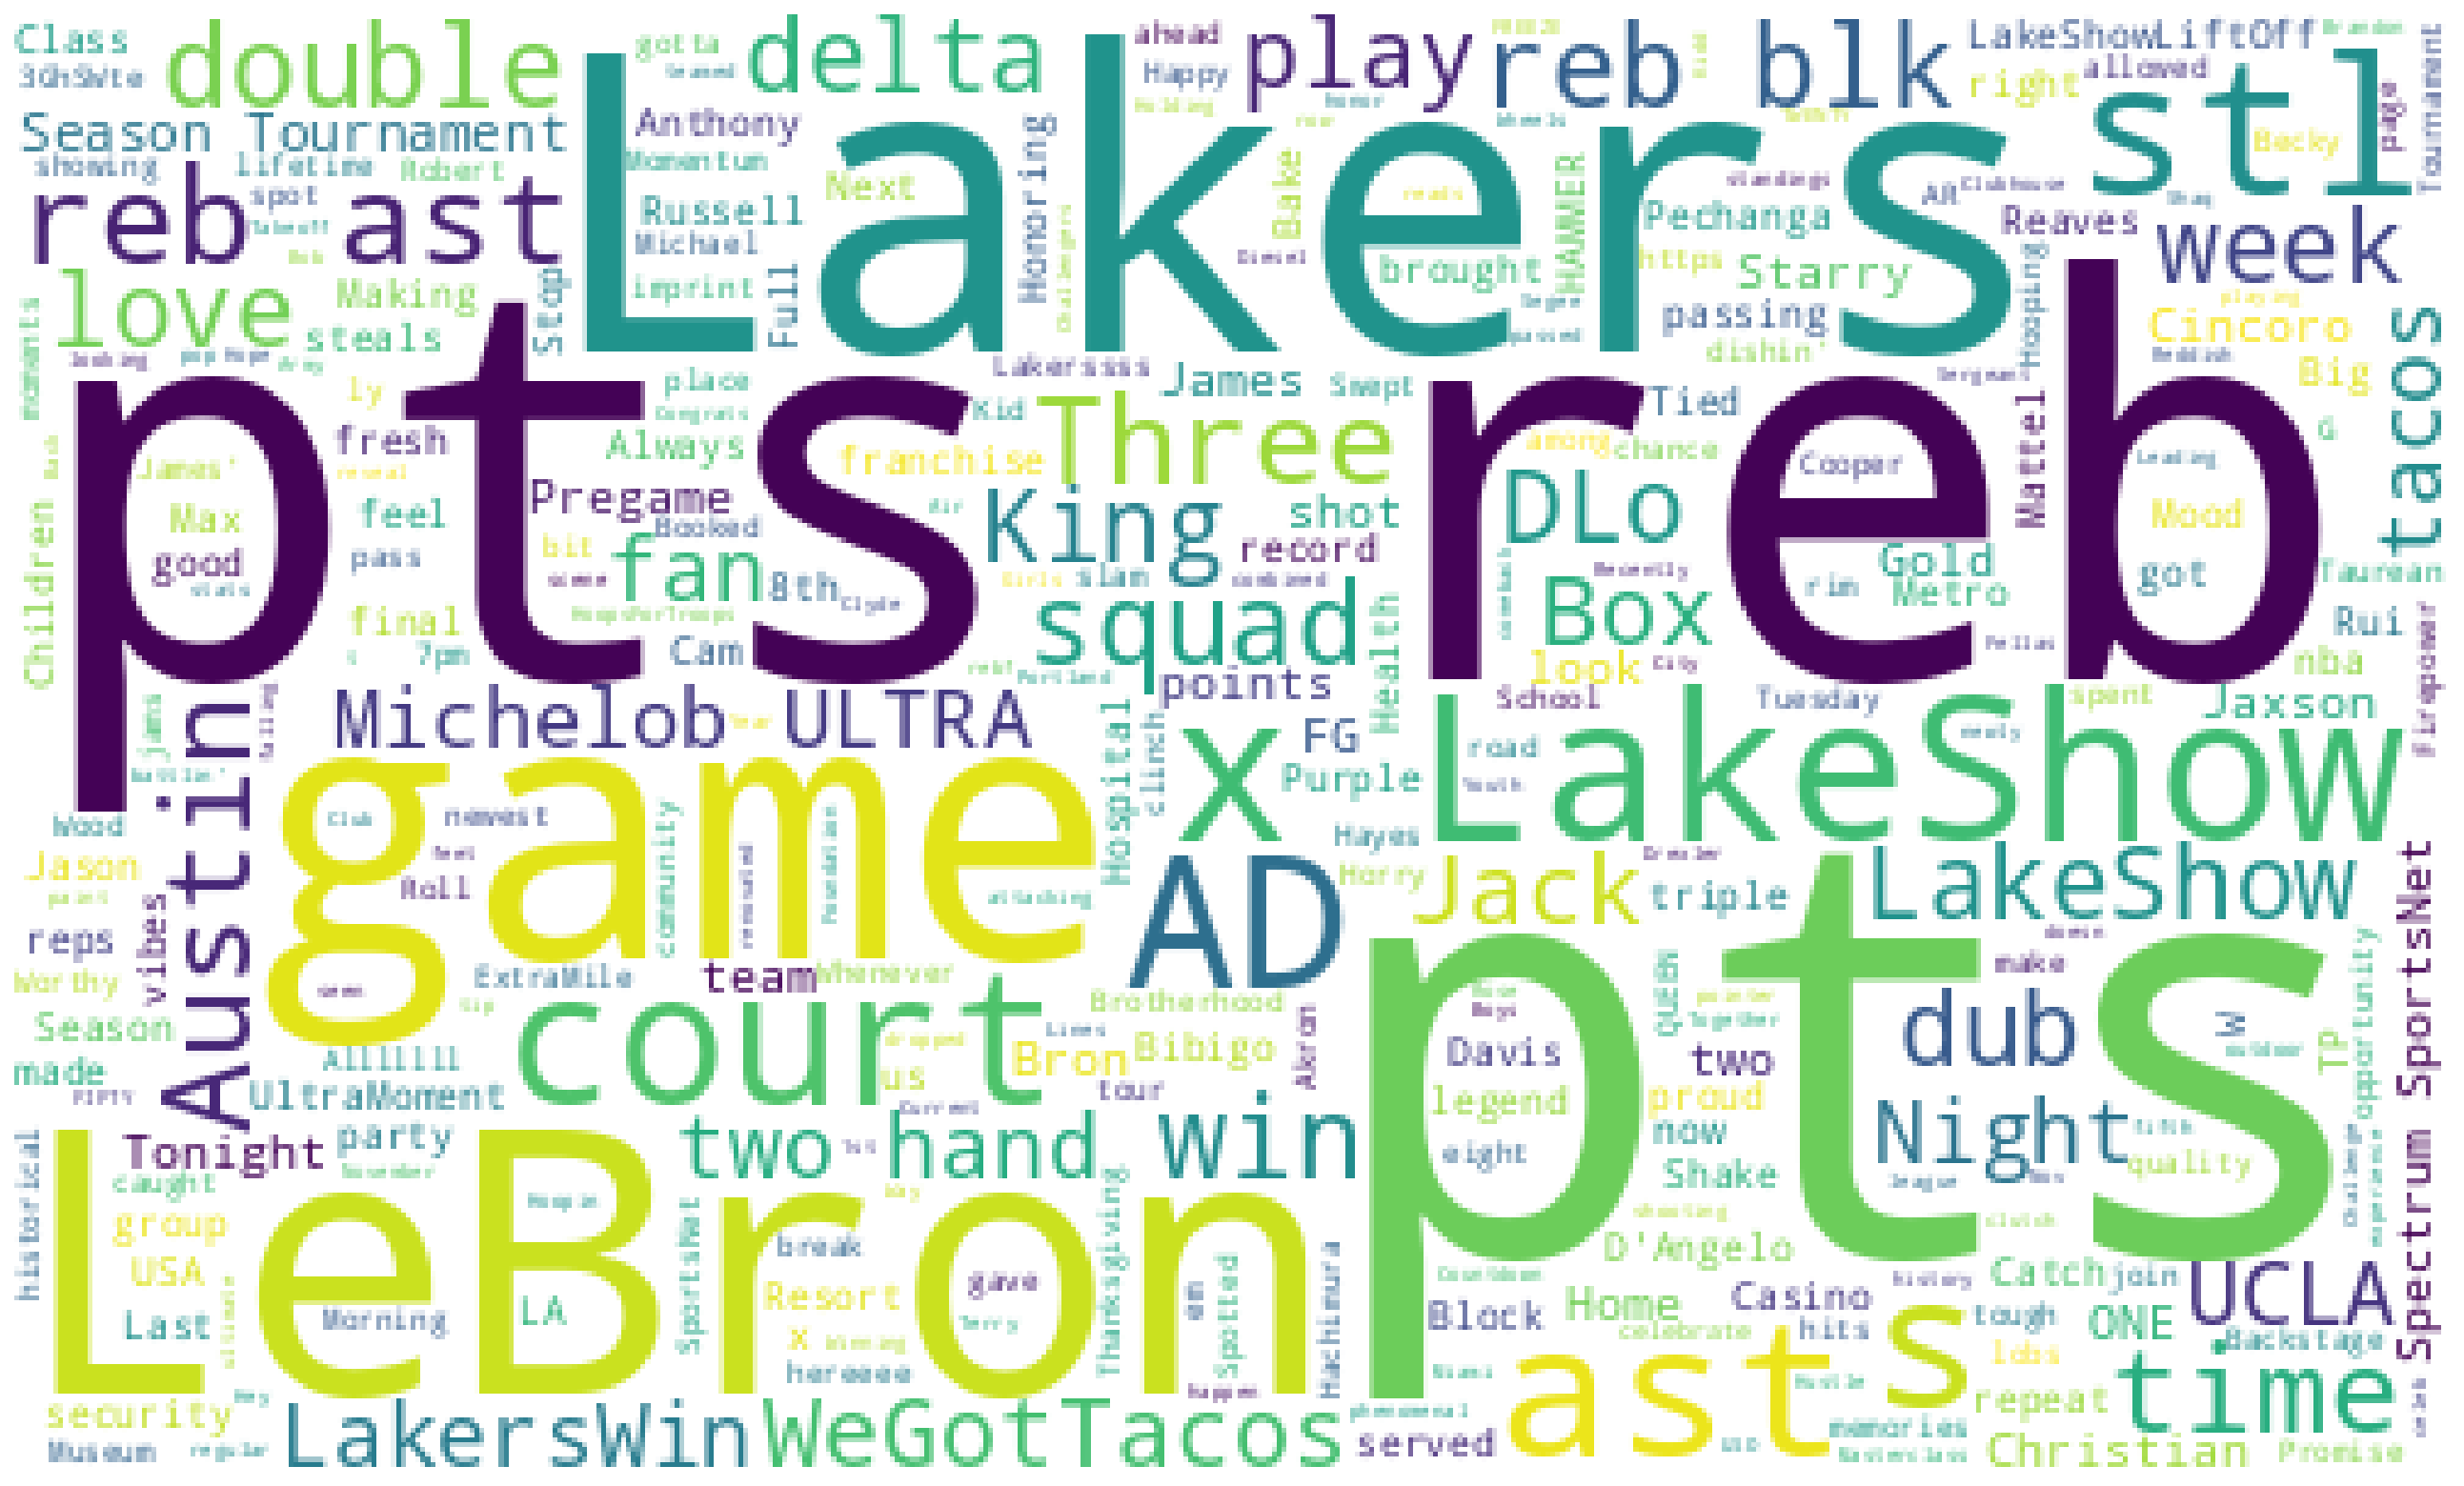

In [37]:
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

keyword thống kê trong thời gian gần đây

In [38]:
text_fix=text
print(len(text))
text

6428


"Tuesday. 7pm. Our place.\nMaking lifetime memories 💜💛\nFull week ahead\n\nCincoro x #LakeShow\n👑🐍♾️\nThe Kid from Akron gave the squad a tour of the I Promise School and LeBron James' Home Court Museum \U0001faf6\nAustin was dishin' em.\nDouble-double in the dub.\n\nExtraMile x #LakeShow\n\n🔗 https://bit.ly/3GhSWte\nAlllllll love for Lakers fans 💜\n“Whenever he has the opportunity to make an imprint on the game, he does.” - Austin on Max\nTeam win.\n\nAD: 32 pts, 13 reb, 3 blk, 3 ast, 2 stl\nLeBron: 22 pts, 6 ast, 6 reb, 2 blk, 2 stl\nAustin: 15 pts, 10 ast, 5 reb, 2 stl\nChristian: 13 pts, 3 reb,\nMax: 12 pts, 5 reb, 3 ast\nDLo: 10 pts, 5 reb, 5 ast, 2 stl\nJaxson: 10 pts, 3 reb\nTaurean: 7 pts, 6 ast, 4 reb, 2 blk\nLAKERS WIN\nBrotherhood\nPregame reps\n🗣️ Lakers are here\nMorning reps\nOn the road again\n\n@delta | #LakeShowLiftOff\nHappy Thanksgiving 🦃\nMomentum.\nThat's so tough TP.\nQUEEN\nPregame vibes 🆙\nAR showing the fans some love pregame 💜\nTonight's Gold.\n\nBibigo USA x 

In [39]:
!pip install -U nltk
!pip install rake-nltk

In [40]:
import nltk
print('The nltk version is {}.'.format(nltk.__version__))

The nltk version is 3.8.1.


In [41]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import tokenize
import math
from operator import itemgetter

In [43]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(text)
# r.get_ranked_phrases()
res_cach1=r.get_ranked_phrases_with_scores()
print(res_cach1)

[(59.82575757575757, 'making lifetime memories 💜💛 full week ahead cincoro x'), (58.0, 'pechanga resort casino f1 meets lake show 🏎️🏀'), (52.04761904761905, 'becky g \U0001faf6 hammer time 🔨 two hands'), (47.0, 'nba history \U0001fae1 fellas looking fresh leading'), (45.576190476190476, '2 blk lakers win brotherhood pregame reps 🗣️ lakers'), (43.5, 'rose city 🌹 108 regular season triple'), (35.83333333333333, 'queen pregame vibes 🆙 ar showing'), (35.16666666666667, '15 fg ), 10 rebf austin reaves'), (33.464285714285715, 'happen 🔋 freeze 👑 two hands'), (29.2, 'season tournament wins ✔️ hustle made'), (27.166666666666668, 'lakeshow fresh look 👀 20 dimes'), (26.514285714285716, 'season tournament court 😍 let ’'), (25.232142857142858, '2 stl holding court 👑 three'), (24.150000000000002, 'squad visiting ucla mattel children ’'), (23.0, 'lakeshowliftoff happy thanksgiving 🦃 momentum'), (22.583333333333336, '2018 -- lebron dropped fifty'), (22.5, 'lakeshow 🔗 https :// bit'), (22.04761904761904

In [44]:
def get_unique_numbers(numbers):
    unique = []

    for number in numbers:
        if number in unique:
            continue
        else:
            unique.append(number)
    return unique


stop_words=[i[1] for i in res_cach1]
stop_words.reverse()
stop_words=get_unique_numbers(stop_words)
# stop_words=set(stop_words)
print(stop_words)

['7pm', '8th', '?!', 'appropriate', 'arrival', 'attacking', 'back', 'basketball', 'battlin', 'begin', 'booked', 'boys', 'break', 'celebrate', 'chance', 'charge', 'cleared', 'com', 'congrats', 'countdown', 'dishin', 'doubles', 'em', 'energy', 'everyone', 'falling', 'families', 'fifth', 'follow', 'get', 'hammers', 'honor', 'honoring', 'hoopsfortroops', 'hosting', 'house', 'imprint', 'invited', 'kid', 'lead', 'league', 'legends', 'ly', 'make', 'miami', 'notice', 'november', 'opportunity', 'paint', 'place', 'playmakin', 'pointer', 'prepare', 'presented', 'provided', 'purple', 'reevaluated', 'return', 'reveal', 'road', 'salute', 'served', 'servicemen', 'session', 'shaq', 'squeaks', 'tied', 'tip', 'tour', 'tuesday', 'twenty', 'updates', 'use', 'way', 'weekend', 'women', '…', 'box', 'jack', '.”', '35', 'double', 'good', 'got', 'night', 'proud', 'right', 'steals', 'threes', 'ultramoment', '14', '22', 'gold', 'ad', 'game', 'sportsnet', 'wegottacos', '11', '5', 'catch', 'group', 'max', 'plays', 

In [45]:
for i in stop_words:
  text = text.replace(i,"");


In [46]:
# tìm số từ xuất hiện trong tài liệu
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

#tìm số câu xuất hiện trong tài liệu
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len)


986
58


In [47]:
# Tính TF cho mỗi từ
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
print(tf_score)

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{'Tuesday': 1, '': 25, 'Our': 2, 'Ma': 2, 'life': 1, 'mories': 1, '💜💛': 1, 'Full': 2, 'eek': 2, 'ahe': 1, 'Cincoro': 3, 'x': 10, '#LakeSho': 13, '👑🐍♾️': 1, 'The': 5, 'Kid': 1, 'from': 3, 'Akron': 1, 'gave': 1, 'the': 53, 'squ': 3, 'a': 9, 'of': 11, 'I': 1, 'Promise': 1, 'School': 1, 'and': 14, 'LeBron': 6, "James'": 1, 'Home': 2, 'Court': 2, 'Mum': 1, '\U0001faf6': 2, 'Atin': 4, 'as': 4, "'": 3, 'Double-': 1, 'in': 14, 'ExtraMile': 1, '🔗': 1, 'https://bit/3GhSWte': 1, 'Alllllll': 1, 'for': 10, 'Lakers': 11, '💜': 6, '“Whenever': 1, 'he': 2, 'has': 3, 'to': 22, 'an': 1, 'on': 15, ',': 45, 'does': 1, '-': 4, 'Max': 1, 'Team': 1, 'AD:': 3, '2': 5, 'stl': 8, 'LeBron:': 3, 'pts,': 4, 'Atin:': 2, '1': 1, 'reb,': 5, 'Christian:': 2, 'Max:': 1, 'DLo:': 3, 'ast,': 1, 'Jaxson:': 2, 'Taurean:': 1, 'LAKERS': 1, 'WIN': 2, 'Brotherhood': 1, 'Pre': 2, 'reps': 2, '🗣️': 2, 'are': 3, 'here': 1, 'Morning': 1, 'On': 4, 'again': 1, '@': 3, '|': 13, '#LakeShoLiftOff': 2, 'Happy': 1, 'Thanksgiving': 1, '🦃': 1

In [48]:
def check_sent(word, sentences):
    final = [all([w in x for w in word]) for x in sentences]
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))


#  Tính IDF cho mỗi từ
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

print(idf_score)

# tính kết quả là tích TF*IDF
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
print(tf_idf_score)

{'Tuesday': 4.060443010546419, '': 0.0, 'Our': 1.6625477377480486, 'Ma': 1.1700712526502546, 'life': 4.060443010546419, 'mories': 4.060443010546419, '💜💛': 4.060443010546419, 'Full': 1.575536360758419, 'eek': 0.8023464725249373, 'ahe': 4.060443010546419, 'Cincoro': 1.575536360758419, 'x': 1.1160040313799788, '#LakeSho': 1.2878542883066382, '👑🐍♾️': 4.060443010546419, 'The': 0.9249487946172696, 'Kid': 4.060443010546419, 'from': 1.421385680931161, 'Akron': 4.060443010546419, 'gave': 4.060443010546419, 'the': 0.371563556432483, 'squ': 2.268683541318364, 'a': 0.2992428948528569, 'of': 0.9249487946172696, 'I': 4.060443010546419, 'Promise': 4.060443010546419, 'School': 4.060443010546419, 'and': 0.8023464725249373, 'LeBron': 1.2878542883066382, "James'": 4.060443010546419, 'Home': 1.575536360758419, 'Court': 1.3523928094442093, 'Mum': 4.060443010546419, '\U0001faf6': 3.367295829986474, 'Atin': 0.8823891801984737, 'as': 0.39688136441677296, "'": 1.6625477377480486, 'Double-': 4.060443010546419, 

In [49]:
# Lấy N từ quan trọng nhất của document
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n])
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 10)

{',': 0.061721781364086625,
 '|': 0.02077279177470532,
 'the': 0.01997248325651278,
 '&': 0.017156453237250353,
 '#LakeSho': 0.016979823273819774,
 'In-Season': 0.013560591528532093,
 '💜': 0.012867339927937765,
 '2': 0.012429031937689244,
 'FG),': 0.012354289078741641,
 'Lakers': 0.011878111670300923}